In [6]:
import pickle 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from os.path import join

import sys
sys.path.append('/home/monte.flora/python_packages/scikit-explain/')
from skexplain.plot.base_plotting import PlotStructure

In [7]:
DATA_PATH = '/work/mflora/explainability_work/datasets'

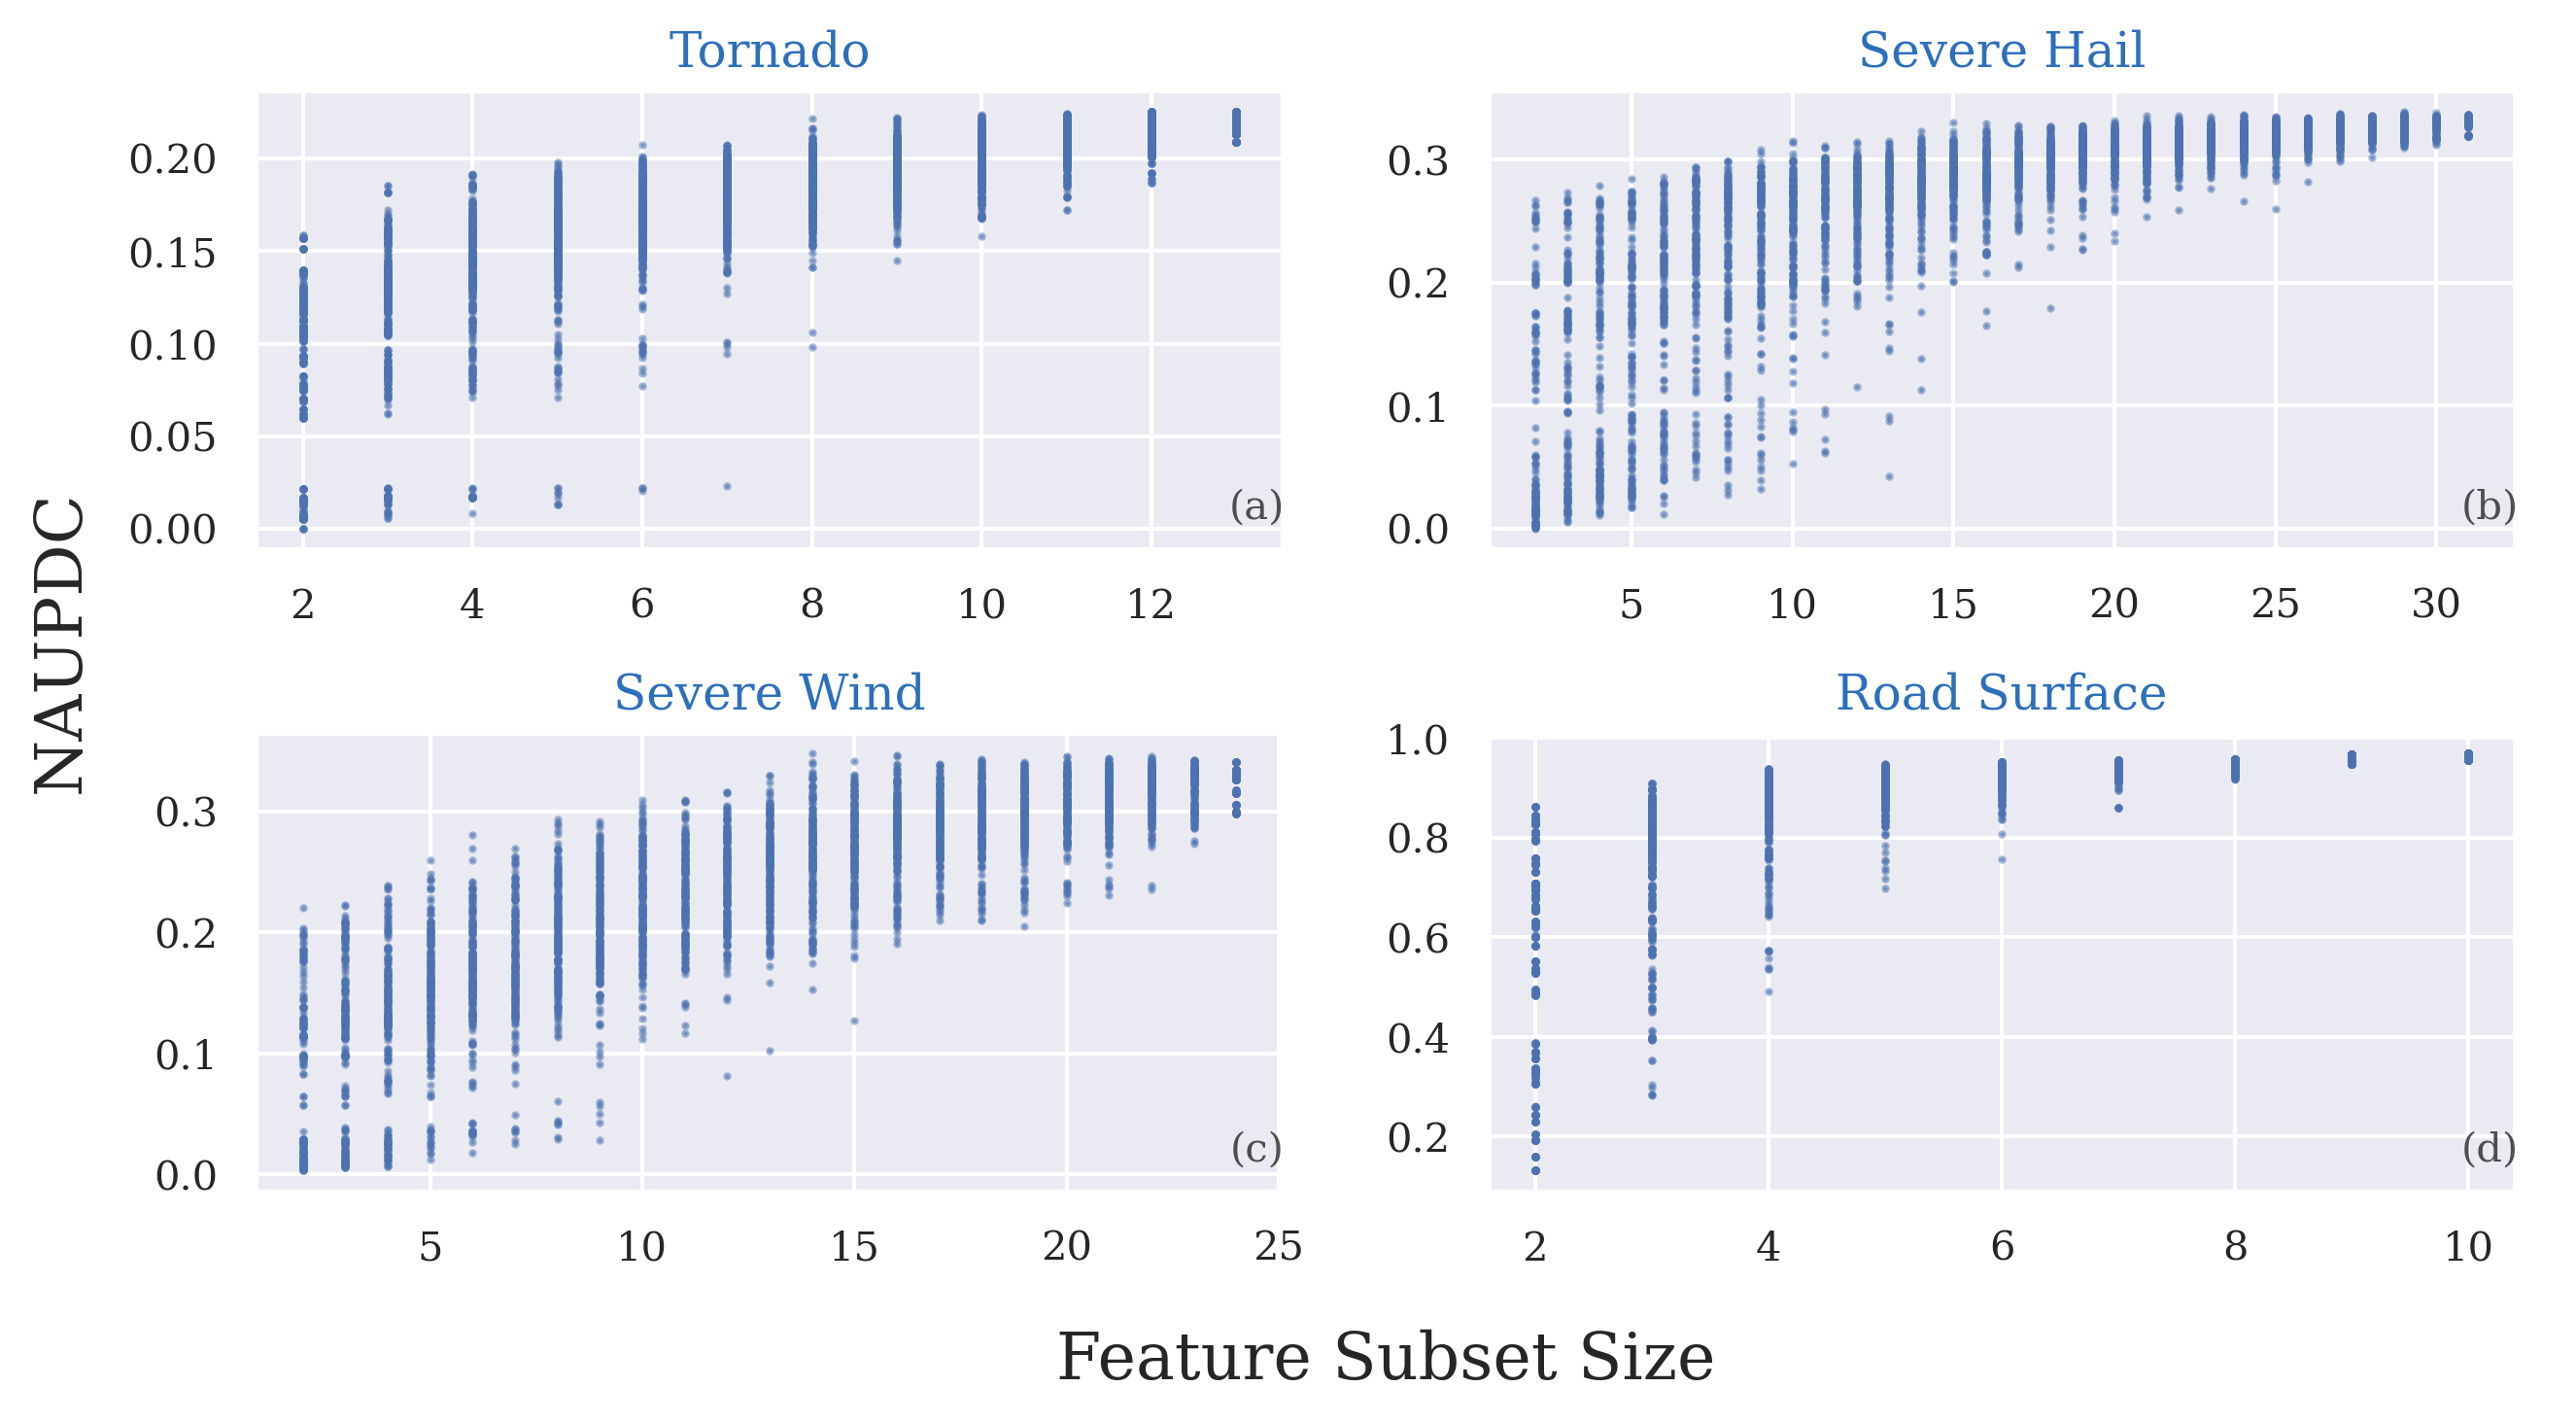

In [8]:
base_plt = PlotStructure(BASE_FONT_SIZE = 16, seaborn_kws={'style' : 'darkgrid'})


fig, axes = base_plt.create_subplots(n_panels = 4, 
                                   n_columns=2, figsize=(10,5), 
                                   dpi=300, wspace=0.4, hspace=0.4, )

targets = ['tornado', 'severe_hail', 'severe_wind', 'road_surface']
opt = ''

option = 'reduced'
opt = '' if option == 'original' else 'L1_based_feature_selection_with_manual'


for ax, target in zip(axes.flat, targets):
    
    if target == 'road_surface':
        fname = join(DATA_PATH, f'RF_road_surface_{option}__scores.pkl')
    else:
        fname = join(DATA_PATH, f'LogisticRegression_first_hour_{target}_{opt}__scores.pkl')
    
    with open(fname, 'rb') as f:
        results = pickle.load(f)
    
    sizes = np.array([len(l) for l in results['subsets']]).astype(float)
    #bins = np.arange(0, 105, 5)
    #bin_inds = np.digitize(sizes, bins=bins)
    
    scores = np.array(results['scores'])
    #scores_90th = [np.mean(scores[bin_inds==i]) for i in np.unique(bin_inds)]
    
    ax.scatter(sizes, scores, s=1, alpha=0.5)
    #ax.plot(bins, scores_90th, color = 'red')
    ax.set_title(target.replace('_', ' ').title(), color = 'xkcd:medium blue')
    
major_ax = base_plt.set_major_axis_labels(fig, xlabel='Feature Subset Size', 
                                          ylabel_left='NAUPDC', 
                              )
major_ax.grid(False)

base_plt.add_alphabet_label(n_panels=4, axes=axes, pos=(0.975, 0.09), fontsize=14)  

plt.subplots_adjust(wspace=0.2)